In [1]:
# Specify which beta to use for generating plots
best_para = 0.1

In [2]:
# model output load path
load_file = '../model_output/beta_' + str(best_para) + '/'
save_file = 'plots/beta_' + str(best_para) + '/'

In [4]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
from scipy.stats import norm

from sklearn.metrics import mean_squared_error as mse
from sklearn.neighbors import KernelDensity
from sklearn import linear_model

In [5]:
# print(os.getcwd())

In [6]:
# matplotlib.__version__

In [7]:
# load data
AMOC_Obs = pd.read_csv('input_data/dtdata_AMOC_Obs.csv', index_col = 0) # 1680 rows × 2 columns
AMOCindex_Obs = pd.read_csv('input_data/dtdata_AMOCindex_Obs.csv', index_col = 0) # 1680 rows × 2 columns

In [8]:
Obs_pred = np.load(load_file + 'Obs_pred.npy')

emp_prob = np.load(load_file + 'emp_prob.npy')
test_bias = np.load(load_file + 'test_bias.npy')

In [11]:
# change font size plt

# check: https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams for systematically change plot format
# font = {'size': 12}
plt.rcParams.update({'font.size':16, 'legend.fontsize':12})

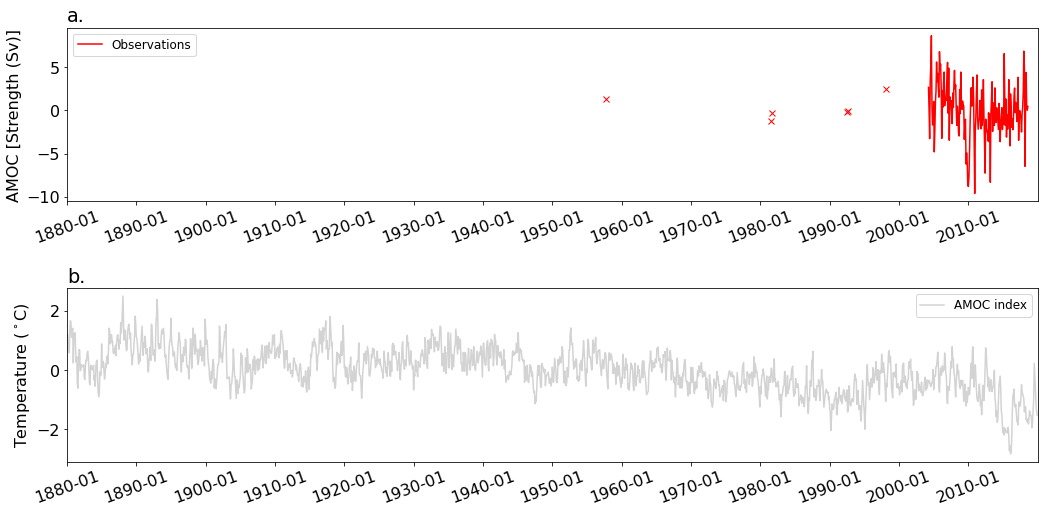

In [12]:
### Plot Obs data: AMOC and AMOC Index

AMOC = AMOC_Obs.loc[~AMOC_Obs['Obs'].isna(), 'Obs']
AMOC = AMOC - AMOC.mean()

AMOC_index = AMOCindex_Obs['Obs']
AMOC_index = AMOC_index - AMOC_index.mean()

foo = plt.figure(figsize=(15, 7))
plt.tight_layout()
# AMOC plot
plt.subplot(2, 1, 1)
plt.tight_layout(pad = 2)
for i in range(6):
    plt.plot(AMOC.index[i], AMOC.values[i], c='red', marker='x')
plt.plot(AMOC.index[6:], AMOC.values[6:], c='red', label='Observations')
# xticks for every 10 years
xlocs=np.arange(0, len(AMOC_Obs), step=120)
plt.xticks(xlocs, AMOC_Obs['datetime'][xlocs], rotation=20)
plt.xlim((0, len(AMOC_Obs)))
plt.ylabel(r'AMOC [Strength (Sv)]')
plt.title('a.', loc = 'left')
plt.legend()

# AMOC index plot
plt.subplot(2, 1, 2)
plt.plot(AMOC_index, c='lightgray', label='AMOC index')
plt.xticks(xlocs, AMOC_Obs['datetime'][xlocs], rotation=20)
plt.xlim((0, len(AMOC_Obs)))
plt.ylabel('Temperature ($^\circ$C)')
plt.title('b.', loc = 'left')
plt.legend()

plt.subplots_adjust(hspace=0.5)

# foo.savefig(save_file + 'Obs.png', bbox_inches='tight')

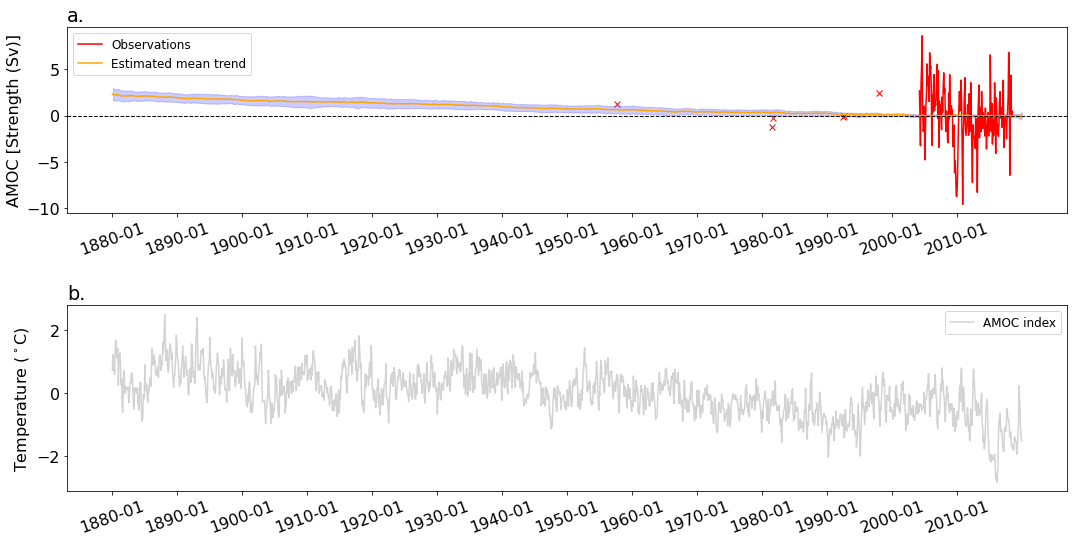

In [14]:
### Plot Obs data with confidence interval: AMOC and AMOC Index

### confidence interval ###
Obs_pred_1000 = np.squeeze(Obs_pred)
mean = np.mean(Obs_pred_1000, axis=0)
std = np.std(Obs_pred_1000, axis=0)
ci = 1.96 * std

# AMOC plot
foo = plt.figure(figsize=(15, 7))
plt.subplot(2, 1, 1)
plt.tight_layout()
for i in range(6):
    plt.plot(AMOC.index[i], AMOC.values[i], c='red', marker='x')
plt.plot(AMOC.index[6:], AMOC.values[6:], c='red', label='Observations')
plt.plot(mean, c='orange', label='Estimated mean trend')
plt.fill_between(np.linspace(1, len(AMOC_Obs), len(AMOC_Obs)), (mean-ci), (mean+ci), color='b', alpha=.2)
# xticks for every 10 years
xlocs=np.arange(0, len(AMOC_Obs), step=120)
plt.xticks(xlocs, AMOC_Obs['datetime'][xlocs], rotation=20)
# plt.xlim((0, len(AMOC_Obs)))
plt.axhline(y=0, color='black', linestyle='--', lw=1)
plt.ylabel(r'AMOC [Strength (Sv)]')
plt.title('a.', loc = 'left')
plt.legend()

# AMOC index plot
plt.subplot(2, 1, 2)
plt.plot(AMOC_index, c='lightgray', label='AMOC index')
plt.xticks(xlocs, AMOC_Obs['datetime'][xlocs], rotation=20)
# plt.xlim((0, len(AMOC_Obs)))
plt.ylabel('Temperature ($^\circ$C)')
plt.title('b.', loc = 'left')
plt.legend()

plt.subplots_adjust(hspace=0.5)
# foo.savefig(save_file + 'Obs_pred_para.png', bbox_inches='tight')

In [14]:
# # Get some example for testing data set###

# # l = [400, 600, 1000, 1700, 3000, 10000]
# l = [0, 1000, 4000, 8000, 10000]

# for i in l:
#     test_pred_1000 = np.load(load_file + 'test_pred_' + str(i) + '.npy')
#     AMOC_input_test = np.load(load_file + 'AMOC_input_test_' + str(i) + '.npy')
#     AMOCindex_input_test = np.load(load_file + 'AMOCindex_input_test_' + str(i) + '.npy')
#     target_test = np.load(load_file + 'target_test_' + str(i) + '.npy')
    
#     test_pred_1000 = np.squeeze(test_pred_1000)
#     AMOC_input_test = np.squeeze(AMOC_input_test)
#     AMOCindex_input_test = np.squeeze(AMOCindex_input_test)
#     target_test = np.squeeze(target_test)
    
#     ### confidence interval ###
#     test_pred_1000 = np.squeeze(test_pred_1000)
#     mean = np.mean(test_pred_1000, axis=0)
#     std = np.std(test_pred_1000, axis=0)
#     x = np.linspace(1, test_pred_1000.shape[1], test_pred_1000.shape[1])
#     ci = 1.96 * std
    
#     mask = np.array(~AMOC_Obs['Obs'].isna())

#     foo = plt.figure(figsize=(15, 5))
#     plt.subplot(2, 1, 1)
#     plt.tight_layout(pad = 2)
#     for j in range(6):
#         plt.plot(x[mask][j], AMOC_input_test[j], c='red', marker='x')
#     plt.plot(x[mask][6:], AMOC_input_test[6:], c='red', label='Observations')
#     plt.plot(target_test, c='blue', label='True mean trend')
#     plt.plot(mean, c='orange', label='Estimated mean trend')
#     plt.fill_between(x, (mean-ci), (mean+ci), color='navy', alpha=.2)
#     plt.ylabel(r'AMOC [Strength (Sv)]')
#     plt.legend()
    
#     plt.subplot(2, 1, 2)
#     plt.plot(AMOCindex_input_test, c='lightgray', label='AMOC index')
#     plt.ylabel('Temperature ($^\circ$C)')
#     plt.legend()

# #     foo.savefig(save_file + str(i) +'.png', bbox_inches='tight')

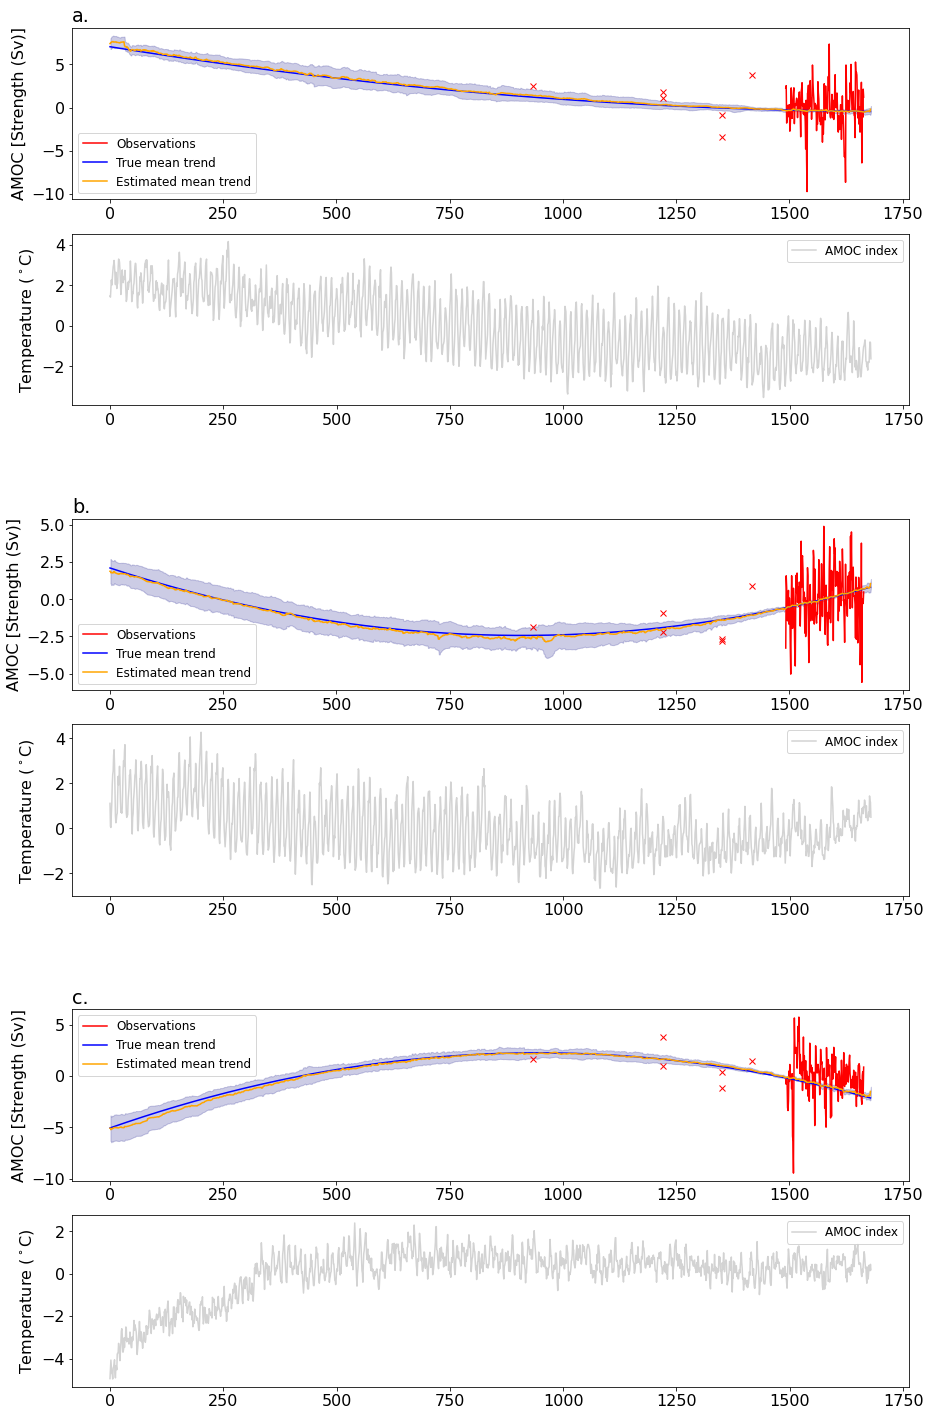

In [15]:
l = [0, 1000, 10000]
legend = ['a', 'b', 'c']

fig = plt.figure(figsize=(15, 25))
outer = gridspec.GridSpec(len(l), 1, hspace = 0.3)

for i, case in enumerate(l):
    test_pred_1000 = np.load(load_file + 'test_pred_' + str(case) + '.npy')
    AMOC_input_test = np.load(load_file + 'AMOC_input_test_' + str(case) + '.npy')
    AMOCindex_input_test = np.load(load_file + 'AMOCindex_input_test_' + str(case) + '.npy')
    target_test = np.load(load_file + 'target_test_' + str(case) + '.npy')
    
    test_pred_1000 = np.squeeze(test_pred_1000)
    AMOC_input_test = np.squeeze(AMOC_input_test)
    AMOCindex_input_test = np.squeeze(AMOCindex_input_test)
    target_test = np.squeeze(target_test)
    
    ### confidence interval ###
    test_pred_1000 = np.squeeze(test_pred_1000)
    mean = np.mean(test_pred_1000, axis=0)
    std = np.std(test_pred_1000, axis=0)
    x = np.linspace(1, test_pred_1000.shape[1], test_pred_1000.shape[1])
    ci = 1.96 * std
    
    mask = np.array(~AMOC_Obs['Obs'].isna())
    
    ax1 = plt.Subplot(fig, outer[i])
    fig.add_subplot(ax1)
    ax1.axis('off')
    ax1.set_title(legend[i]+'.', loc = 'left')
    
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], hspace=0.2)
    
    ax = fig.add_subplot(inner[0])
    for j in range(6):
        ax.plot(x[mask][j], AMOC_input_test[j], c='red', marker='x')
    ax.plot(x[mask][6:], AMOC_input_test[6:], c='red', label='Observations')
    ax.plot(target_test, c='blue', label='True mean trend')
    ax.plot(mean, c='orange', label='Estimated mean trend')
    ax.fill_between(x, (mean-ci), (mean+ci), color='navy', alpha=.2)
    ax.set_ylabel(r'AMOC [Strength (Sv)]')
    ax.legend()
    
    ax = fig.add_subplot(inner[1])
    ax.plot(AMOCindex_input_test, c='lightgray', label='AMOC index')
    ax.set_ylabel('Temperature ($^\circ$C)')
    ax.legend()
    
# fig.savefig(save_file + 'test_case.png', bbox_inches='tight')

[]

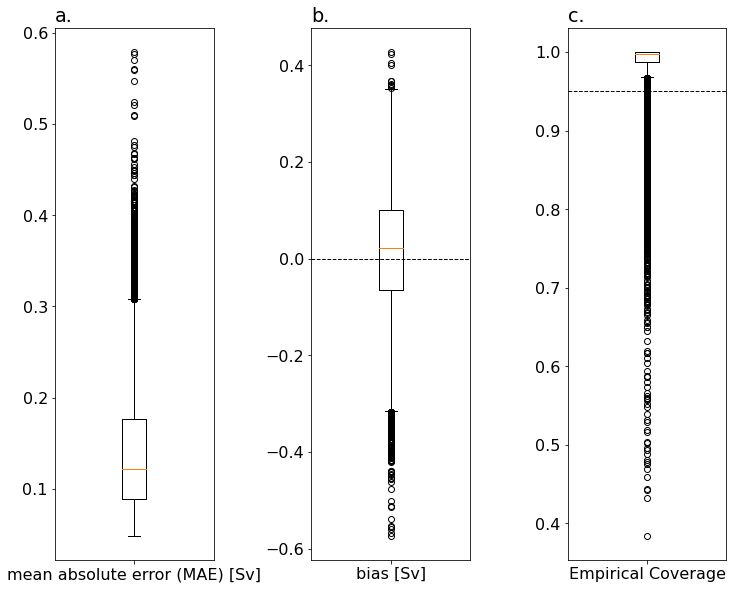

In [16]:
foo = plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.tight_layout(pad = 5)
bias = np.absolute(test_bias)
box_bias_mae = np.sum(bias, axis=1)/len(AMOC_Obs)
plt.boxplot(box_bias_mae, labels=['mean absolute error (MAE) [Sv]'])
plt.title('a.', loc = 'left')

plt.subplot(1, 3, 2)
box_bias = np.sum(test_bias, axis=1)/len(AMOC_Obs)
plt.boxplot(box_bias, labels=['bias [Sv]'])
plt.axhline(y=0, color='black', linestyle='--', lw=1)
plt.title('b.', loc = 'left')

plt.subplot(1, 3, 3)
plt.boxplot(emp_prob, labels=['Empirical Coverage'])
plt.axhline(y=0.95, color='black', linestyle='--', lw=1)
plt.title('c.', loc = 'left')

plt.plot()

# foo.savefig(save_file + 'bias_all.png', bbox_inches='tight')

In [17]:
# 5-number summary for empirical probability
print(np.percentile(emp_prob, [0, 25, 50, 75, 100]))

[0.38452381 0.98690476 0.99761905 1.         1.        ]


In [18]:
# 5-number summary for MAE
print(np.percentile(box_bias_mae, [0, 25, 50, 75, 100]))

[0.04873803 0.08888688 0.12219282 0.17661351 0.57884109]


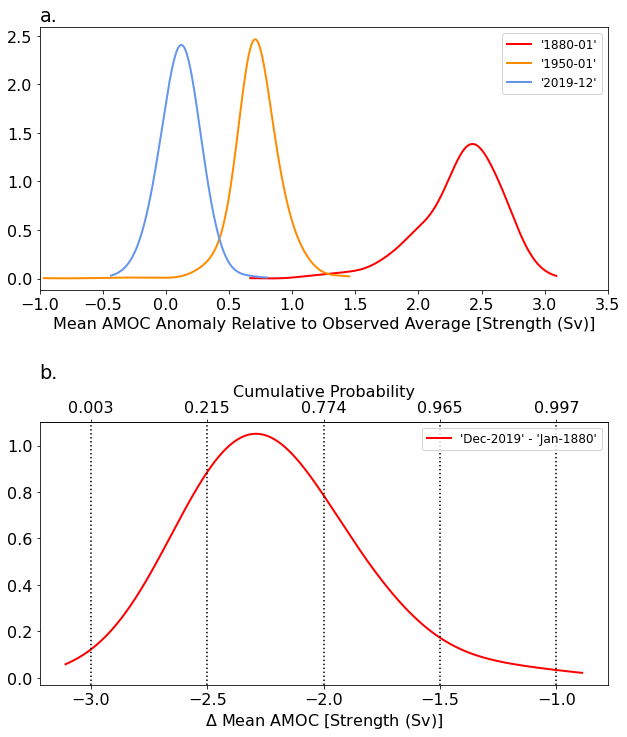

In [17]:
# AMOC Obs prediction KDE plots
fig, ax = plt.subplots(2, 1, figsize=(9, 10))
plt.tight_layout()

point = [0, 840, 1679]
colors = ['red', 'darkorange', 'cornflowerblue']
bandwidth = [0.1, 0.1, 0.1]
# bandwidth = [0.2, 0.2, 0.2]

for a, color, w in zip(point, colors, bandwidth):
    X_inp = Obs_pred[:, a, :]
    kde = KernelDensity(kernel='gaussian', bandwidth=w).fit(X_inp)
    X_plot = np.linspace(np.min(X_inp), np.max(X_inp), 5000)[:, np.newaxis]
    log_dens = kde.score_samples(X_plot)
    position = AMOC_Obs['datetime'][a]
    ax[0].plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=2,
            linestyle='-', label="'{0}'".format(position))

ax[0].legend(loc='upper right')
# ax[0].set_xlim(-3.5, 4)
ax[0].set_xlim(-1, 3.5)
ax[0].set_xlabel('Mean AMOC Anomaly Relative to Observed Average [Strength (Sv)]')
ax[0].set_title('a.', loc = 'left')

X_inp = Obs_pred[:, point[-1], :] - Obs_pred[:, point[0], :]
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X_inp)
X_plot = np.linspace(np.min(X_inp), np.max(X_inp), 5000)[:, np.newaxis]
log_dens = kde.score_samples(X_plot)

ax[1].plot(X_plot[:, 0], np.exp(log_dens), color='red', lw=2,
            linestyle='-', label="'Dec-2019' - 'Jan-1880'")
ax[1].legend(loc='upper right')
ax[1].set_xlabel(r'$\Delta$ Mean AMOC [Strength (Sv)]')
ax[1].set_title('b.', loc = 'left')

ticks = [-1.0, -1.5, -2.0, -2.5, -3.0]
labels = []
for i in ticks:
    pct = len(X_inp[X_inp < i])/len(X_inp)
    labels.append(pct)
    ax[1].axvline(i, color = 'black', linestyle = ':')

ax2 = ax[1].secondary_xaxis('top')
ax2.set_xlabel('Cumulative Probability')
ax2.set_xticks(ticks, labels)

plt.subplots_adjust(hspace=0.5)
plt.show()

# fig.savefig(save_file + 'density.png', bbox_inches='tight')

In [18]:
# Calculate credible interval for $\Delta$ Mean AMOC with qunatile estimation
# l = 0.95
# mean = np.mean(X_inp)
# std = np.std(X_inp)
# z = norm.ppf(1-(1-l)/2)

# lower = mean - z * std / np.sqrt(1000)
# upper = mean + z * std / np.sqrt(1000)
l = 0.99
lower_q = (1-l)/2
upper_q = 1-(1-l)/2

lower = np.quantile(X_inp, lower_q)
upper = np.quantile(X_inp, upper_q)

print(f"The {l*100}% credible interval is:", lower, upper)

The 99.0% credible interval is: -2.9753743068501355 -1.0538361302763226


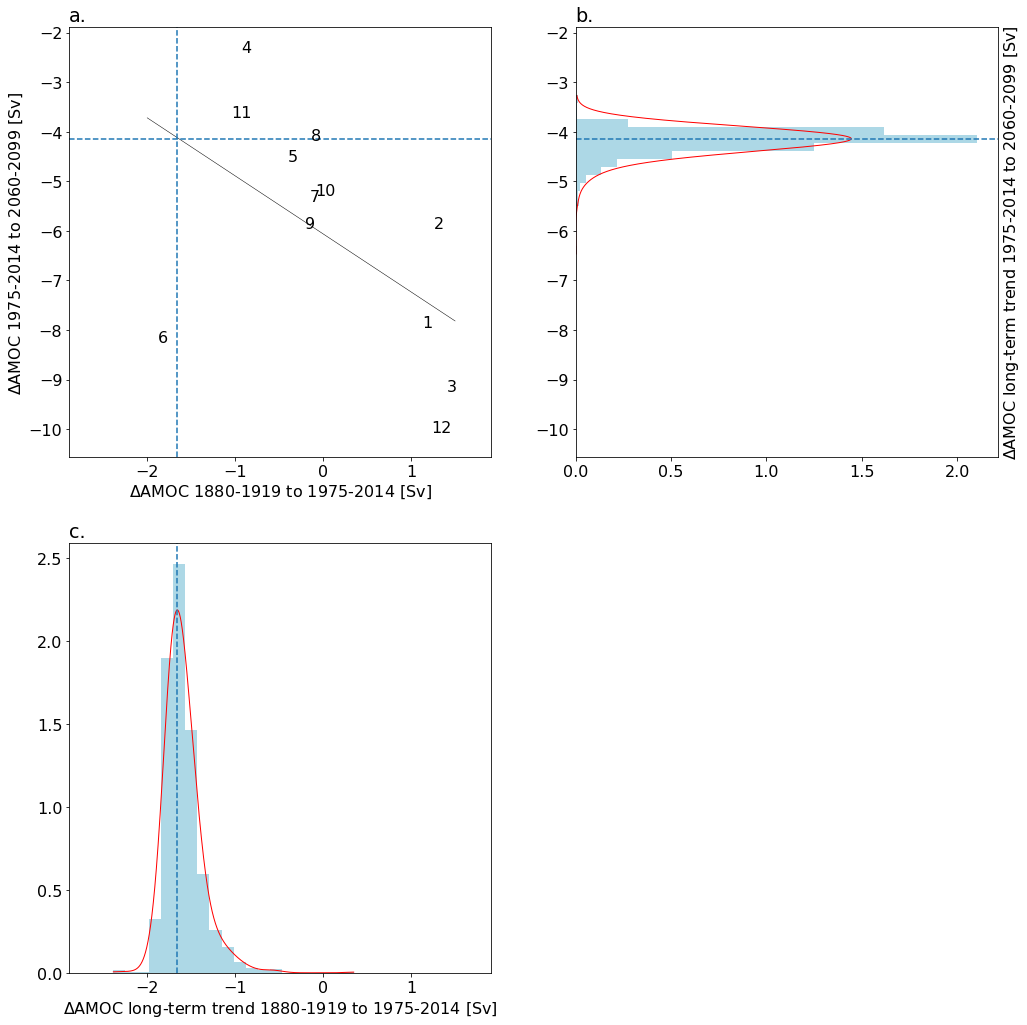

In [12]:
# Future AMOC prediction plots

################################################################################
##Data preprocessing############################################################

# X: current century AMOC data
X = {'Time': list(range(1850, 2015))}

for i in range(1, 13):
    words = ['input_data/AMOC_21C/M', str(i), '_1850_2014_pp_Annual_AMOChistoricalmax265_clim.txt']
    file = ''.join(words)
    a = np.loadtxt(file)
    X[i] = a

X = pd.DataFrame(X)

# Y: future century AMOC data
Y = {'Time': list(range(2015, 2101))}

for i in range(1, 13):
    words = ['input_data/AMOC_21C/M', str(i), '_2015_2100_pp_Annual_AMOCssp585max265_clim.txt']
    file = ''.join(words)
    a = np.loadtxt(file)
    Y[i] = a

Y = pd.DataFrame(Y)

# Observation
Obs_pred = np.load(load_file + 'Obs_pred.npy')

Obs_pred_yearly = np.zeros(shape=(1000, 140))

for i in range(140):
    a = i*12
    Obs_pred_yearly[:, i] = np.mean(Obs_pred[:, a:(a+12), 0], axis=1)

Obs_pred_yearly_1 = np.reshape(np.ravel(Obs_pred_yearly, order='C'), (140, 1000), order='F')

Obs = pd.DataFrame(Obs_pred_yearly_1)
Obs.insert(0, 'Time', list(range(1880, 2020)))

################################################################################
# fit linear regression for 12 different CEMS model AMOC difference
# use 40 years average of AMOC difference at the start and the end of century
# to represent how AMOC change in one century
mean_1 = X[(X['Time'] >= 1880) & (X['Time'] <= 1919)].mean(axis=0)[1:13]
mean_2 = X[(X['Time'] >= 1975) & (X['Time'] <= 2014)].mean(axis=0)[1:13]
mean_3 = Y[(Y['Time'] >= 2060) & (Y['Time'] <= 2099)].mean(axis=0)[1:13]

# delta_X: current century AMOC diff, delta_Y: future century AMOC diff
delta_X = np.array(mean_2 - mean_1).reshape((-1, 1))
delta_Y = np.array(mean_3 - mean_2).reshape((-1, 1))

lr = linear_model.LinearRegression()
lr.fit(delta_X, delta_Y)

x = np.linspace(-2, 1.5, 500).reshape((-1,1))
y_pred = lr.predict(x)



################################################################################
# get prediction for 1000 trails Observation data, 40 years average
mean_1_Obs = Obs[(Obs['Time'] >= 1880) & (Obs['Time'] <= 1919)].mean(axis=0)[1:1001]
mean_2_Obs = Obs[(Obs['Time'] >= 1975) & (Obs['Time'] <= 2014)].mean(axis=0)[1:1001]
Obs_inp = np.array(mean_2_Obs - mean_1_Obs).reshape((-1, 1))
Obs_out = lr.predict(Obs_inp)

# current century gaussian density estimation
kde_inp = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(Obs_inp)
x_Obs_inp = np.linspace(np.min(Obs_inp), np.max(Obs_inp), 5000)[:, np.newaxis]
log_dens_x_inp = kde_inp.score_samples(x_Obs_inp)[:, np.newaxis]

# future century gaussian density estimation
kde_out = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(Obs_out)
x_Obs_out = np.linspace(np.min(Obs_out), np.max(Obs_out), 5000)[:, np.newaxis]
log_dens_x_out = kde_out.score_samples(x_Obs_out)[:, np.newaxis]

a = np.where(log_dens_x_inp == np.max(log_dens_x_inp))
b = np.where(log_dens_x_out == np.max(log_dens_x_out))
#856
#4179

# set plots xlim, ylim
x_min = min(np.min(delta_X), np.min(Obs_inp))
x_max = max(np.max(delta_X), np.max(Obs_inp))
y_min = min(np.min(delta_Y), np.min(Obs_out))
y_max = max(np.max(delta_Y), np.max(Obs_out))

################################################################################
## plot
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
plt.tight_layout()

# dump (1, 1) plot
axes[-1, -1].axis('off')

ax = axes[0][0]
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
#           '#9acd32', '#ffbc14']
# for i, color in enumerate(colors):
#     ax.text(delta_X[i], delta_Y[i], i+1, c=color, fontsize = 16)
# #     ax.scatter(delta_X[i], delta_Y[i], c=color)

for i in range(len(delta_X)):
    ax.text(delta_X[i], delta_Y[i], i+1, fontsize = 16)
ax.plot(x, y_pred, color='black', linewidth=0.5)
ax.axvline(x=x_Obs_inp[a], linestyle='--')
ax.axhline(y=x_Obs_out[b], linestyle='--')
ax.set_xlim((x_min-0.5, x_max+0.5))
ax.set_ylim((y_min-0.5, y_max+0.5))
# legend = ax.legend(*scatter.legend_elements(num=12),
#                     loc="upper left")
# ax.add_artist(legend)
ax.set_xlabel(r'$\Delta$AMOC 1880-1919 to 1975-2014 [Sv]')
ax.set_ylabel(r'$\Delta$AMOC 1975-2014 to 2060-2099 [Sv]')
ax.set_title('a.', loc = 'left')

ax = axes[0][1]
ax.plot(np.exp(log_dens_x_out), x_Obs_out, color='red', lw=1,
            linestyle='-')
ax.hist(Obs_out, density=True, bins=20, color='#add8e6', orientation='horizontal')
ax.axhline(y=x_Obs_out[b], linestyle='--')
ax.set_ylim((y_min-0.5, y_max+0.5))
ax.yaxis.set_label_position("right")
ax.set_ylabel(r'$\Delta$AMOC long-term trend 1975-2014 to 2060-2099 [Sv]')
ax.set_title('b.', loc = 'left')

ax = axes[1][0]
ax.plot(x_Obs_inp, np.exp(log_dens_x_inp), color='red', lw=1,
            linestyle='-')
ax.hist(Obs_inp, density=True, bins=20, color='#add8e6')
ax.axvline(x=x_Obs_inp[a], linestyle='--')
ax.set_xlim((x_min-0.5, x_max+0.5))
ax.set_xlabel(r'$\Delta$AMOC long-term trend 1880-1919 to 1975-2014 [Sv]')
ax.set_title('c.', loc = 'left')

plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.2)
plt.show()

# fig.savefig(save_file + 'AMOC_pred_40y.png', bbox_inches='tight')

In [17]:
# Calculate credible interval for future $\Delta$ Mean AMOC with qunatile estimation
l = 0.95
lower_q = (1-l)/2
upper_q = 1-(1-l)/2

lower = np.quantile(Obs_out, lower_q)
upper = np.quantile(Obs_out, upper_q)

print(f"The {l*100}% credible interval is:", lower, upper)

The 95.0% credible interval is: -4.834719009920947 -3.8655555916912276
